# Model Evaluation Comparison: Base vs Fine-Tuned

This notebook compares evaluation metrics between baseline models and the QLoRA fine-tuned 
Qwen2.5-1.5B model for recipe generation. I analyzed three categories of metrics:

1. **ROUGE Scores** - Lexical overlap metrics measuring n-gram matching between generated and reference recipes
2. **BERTScore** - Semantic similarity metrics using contextual embeddings
3. **Benchmark Scores** - General language understanding capabilities (MMLU, HellaSwag)

**Key Research Question:** Does fine-tuning improve task performance without catastrophic forgetting of general capabilities?


In [5]:
# Setup and Imports
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Set professional visualization style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titleweight'] = 'bold'

# Define color palette for consistent styling
COLORS = {
    'base': '#3498db',      # Blue for base models
    'finetuned': '#27ae60', # Green for fine-tuned
    'accent': '#e74c3c',    # Red for highlights
    'neutral': '#95a5a6'    # Gray for neutral elements
}

print(" Setup complete. Visualization style configured.")


 Setup complete. Visualization style configured.


In [7]:
# Define paths to score directories
ROUGE_BASE_DIR = Path("../Rouge_Scores/Base_Model_Rouge_Results")
ROUGE_FT_DIR = Path("../Rouge_Scores/Fine_Tune_Rouge_Results")
BERT_BASE_DIR = Path("../BERT_Scores/Base_Model_BERT_Results")
BERT_FT_DIR = Path("../BERT_Scores/Fine_Tune_BERT_Results")
BENCH_DIR = Path("../Benchmark_Scores")
OUTPUT_DIR = Path("../Images_Publication")

# Ensure output directory exists
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# Load ROUGE scores for all base models
rouge_base_qwen = json.load(open(ROUGE_BASE_DIR / "eval_results_qwen.json"))
rouge_base_gemma = json.load(open(ROUGE_BASE_DIR / "eval_results_gemma.json"))
rouge_base_gpt = json.load(open(ROUGE_BASE_DIR / "eval_results_GPT-4o-mini.json"))
rouge_base_llama = json.load(open(ROUGE_BASE_DIR / "Llama-3.2-1B-Instruct_eval_results.json"))

# Load ROUGE scores for fine-tuned model
rouge_finetuned = json.load(open(ROUGE_FT_DIR / "eval_results_FineTuned.json"))

# Load BERT scores
bert_base = json.load(open(BERT_BASE_DIR / "base_model_results_bert.json"))
bert_finetuned = json.load(open(BERT_FT_DIR / "eval_results_finetuned_bert.json"))

# Load Benchmark scores
bench_base = json.load(open(BENCH_DIR / "eval_benchmarks_base_model.json"))
bench_finetuned = json.load(open(BENCH_DIR / "eval_benchmarks_finetuned_model.json"))

print(" All score files loaded successfully.")
print(f" ROUGE scores: {len([rouge_base_qwen, rouge_base_gemma, rouge_base_gpt, rouge_base_llama])} base models + 1 fine-tuned")
print(f" BERT scores: 1 base + 1 fine-tuned")
print(f" Benchmark scores: 1 base + 1 fine-tuned")


 All score files loaded successfully.
 ROUGE scores: 4 base models + 1 fine-tuned
 BERT scores: 1 base + 1 fine-tuned
 Benchmark scores: 1 base + 1 fine-tuned


## 1. ROUGE Score Comparison

ROUGE (Recall-Oriented Understudy for Gisting Evaluation) measures lexical overlap between generated and reference text:

- **ROUGE-1**: Unigram (single word) overlap
- **ROUGE-2**: Bigram (two consecutive words) overlap  
- **ROUGE-L**: Longest Common Subsequence - measures sentence-level structure similarity

Higher ROUGE scores indicate better alignment with the reference recipes in terms of word choice and phrasing.


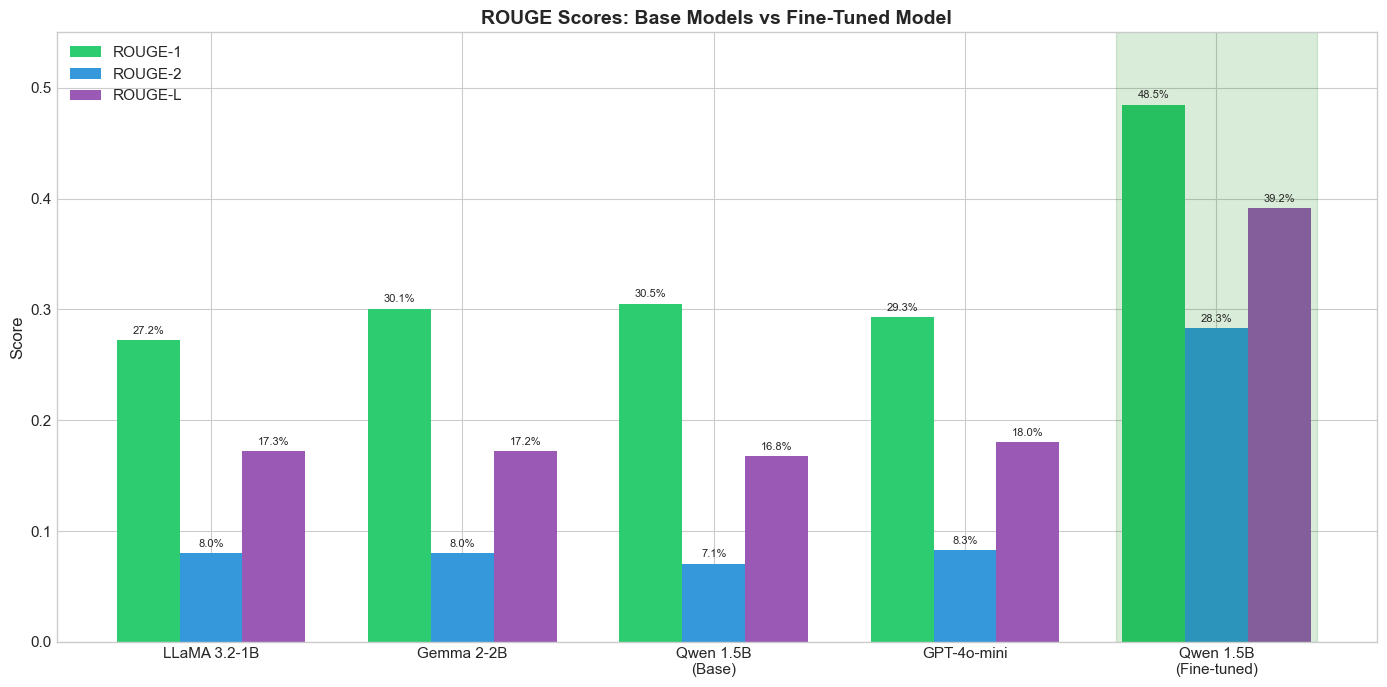

 Figure saved to Images_Publication/rouge_comparison_all_models.png


In [9]:
# ROUGE Score Comparison: All Models
models = ['LLaMA 3.2-1B', 'Gemma 2-2B', 'Qwen 1.5B\n(Base)', 'GPT-4o-mini', 'Qwen 1.5B\n(Fine-tuned)']

rouge1_scores = [
    rouge_base_llama['rouge1'], rouge_base_gemma['rouge1'], 
    rouge_base_qwen['rouge1'], rouge_base_gpt['rouge1'], rouge_finetuned['rouge1']
]
rouge2_scores = [
    rouge_base_llama['rouge2'], rouge_base_gemma['rouge2'],
    rouge_base_qwen['rouge2'], rouge_base_gpt['rouge2'], rouge_finetuned['rouge2']
]
rougeL_scores = [
    rouge_base_llama['rougeL'], rouge_base_gemma['rougeL'],
    rouge_base_qwen['rougeL'], rouge_base_gpt['rougeL'], rouge_finetuned['rougeL']
]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(x - width, rouge1_scores, width, label='ROUGE-1', color='#2ecc71')
bars2 = ax.bar(x, rouge2_scores, width, label='ROUGE-2', color='#3498db')
bars3 = ax.bar(x + width, rougeL_scores, width, label='ROUGE-L', color='#9b59b6')

ax.set_ylabel('Score')
ax.set_title('ROUGE Scores: Base Models vs Fine-Tuned Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='upper left')
ax.set_ylim(0, 0.55)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1%}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

# Highlight fine-tuned model with background
ax.axvspan(3.6, 4.4, alpha=0.15, color='green', label='_nolegend_')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'rouge_comparison_all_models.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Figure saved to Images_Publication/rouge_comparison_all_models.png")


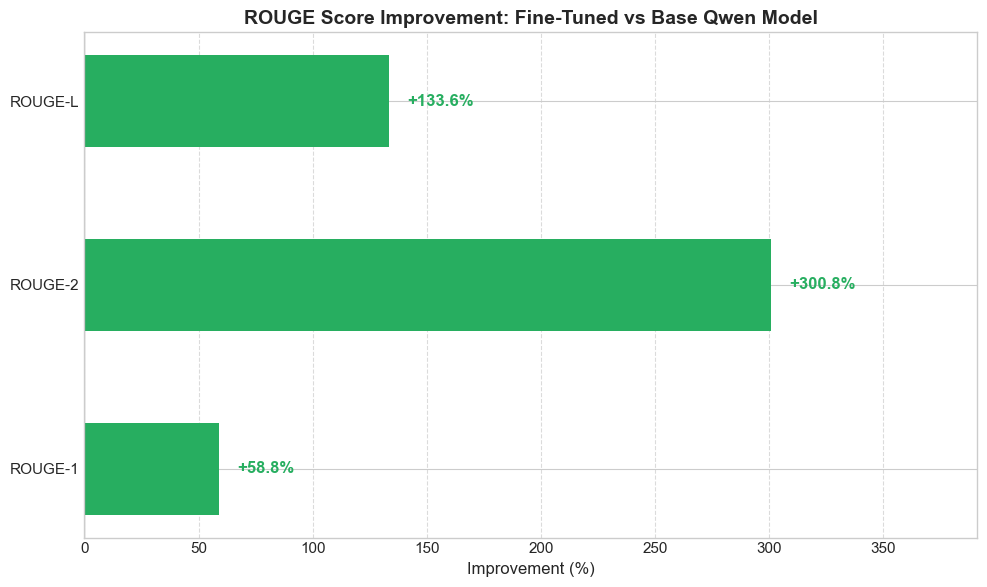

 Figure saved to Images_Publication/rouge_improvement.png

[RESULTS] ROUGE Improvements:
  ROUGE-1: 30.5% -> 48.5% (+58.8%)
  ROUGE-2: 7.1% -> 28.3% (+300.8%)
  ROUGE-L: 16.8% -> 39.2% (+133.6%)


In [11]:
# ROUGE Improvement Analysis: Base Qwen vs Fine-Tuned Qwen
metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
base_scores = [rouge_base_qwen['rouge1'], rouge_base_qwen['rouge2'], rouge_base_qwen['rougeL']]
ft_scores = [rouge_finetuned['rouge1'], rouge_finetuned['rouge2'], rouge_finetuned['rougeL']]
improvements = [(ft - base) / base * 100 for ft, base in zip(ft_scores, base_scores)]

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#27ae60' if imp > 0 else '#e74c3c' for imp in improvements]
bars = ax.barh(metrics, improvements, color=colors, height=0.5)

ax.set_xlabel('Improvement (%)')
ax.set_title('ROUGE Score Improvement: Fine-Tuned vs Base Qwen Model')
ax.axvline(x=0, color='black', linewidth=0.8)

# Add percentage labels
for bar, imp in zip(bars, improvements):
    ax.annotate(f'+{imp:.1f}%', xy=(bar.get_width() + 8, bar.get_y() + bar.get_height()/2),
                va='center', fontsize=12, fontweight='bold', color='#27ae60')

# Add grid for readability
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_xlim(0, max(improvements) * 1.3)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'rouge_improvement.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Figure saved to Images_Publication/rouge_improvement.png")
print(f"\n[RESULTS] ROUGE Improvements:")
for metric, base, ft, imp in zip(metrics, base_scores, ft_scores, improvements):
    print(f"  {metric}: {base:.1%} -> {ft:.1%} (+{imp:.1f}%)")


## 2. BERTScore Comparison

BERTScore uses contextual embeddings from pre-trained language models to measure semantic similarity, going beyond simple lexical overlap:

- **Precision**: How much of the generated content is semantically relevant to the reference
- **Recall**: How much of the reference content is captured in the generation
- **F1**: Harmonic mean of precision and recall

BERTScore is particularly valuable for evaluating text generation because it can recognize paraphrases and semantically equivalent expressions that ROUGE would miss.


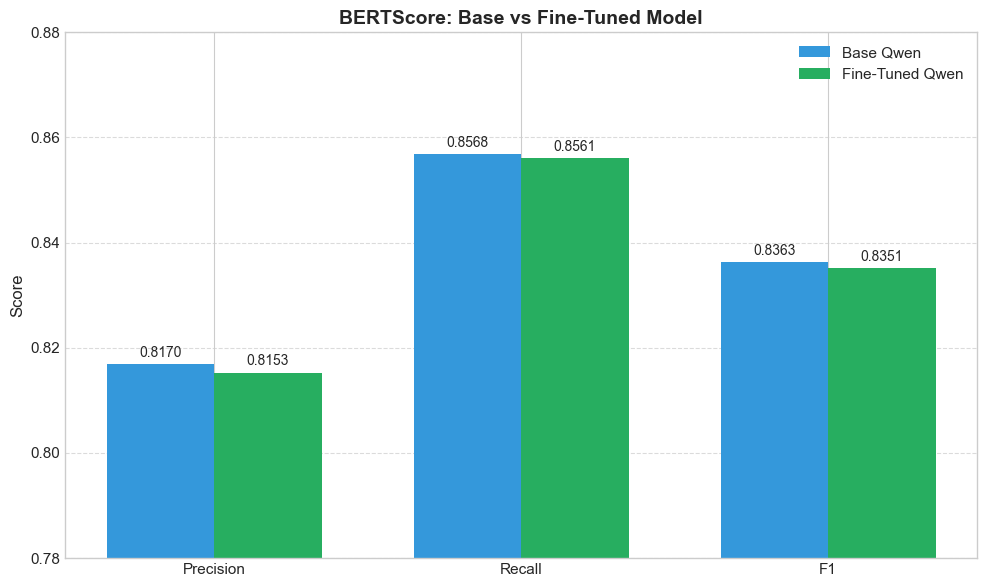

 Figure saved to Images_Publication/bert_comparison.png

 BERTScore Comparison:
  Precision: 0.8170 -> 0.8153 (-0.20%)
  Recall: 0.8568 -> 0.8561 (-0.09%)
  F1: 0.8363 -> 0.8351 (-0.15%)


In [13]:
# BERTScore Comparison: Base vs Fine-Tuned
metrics = ['Precision', 'Recall', 'F1']
base_bert = [bert_base['bert_precision'], bert_base['bert_recall'], bert_base['bert_f1']]
ft_bert = [bert_finetuned['bert_precision'], bert_finetuned['bert_recall'], bert_finetuned['bert_f1']]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, base_bert, width, label='Base Qwen', color=COLORS['base'])
bars2 = ax.bar(x + width/2, ft_bert, width, label='Fine-Tuned Qwen', color=COLORS['finetuned'])

ax.set_ylabel('Score')
ax.set_title('BERTScore: Base vs Fine-Tuned Model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0.78, 0.88)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

# Add horizontal grid
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'bert_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Figure saved to Images_Publication/bert_comparison.png")
print(f"\n BERTScore Comparison:")
for metric, base, ft in zip(metrics, base_bert, ft_bert):
    diff = (ft - base) / base * 100
    print(f"  {metric}: {base:.4f} -> {ft:.4f} ({diff:+.2f}%)")


### BERTScore Analysis Conclusions

| Model | Precision | Recall | F1 |
|-------|-----------|--------|-----|
| Qwen 1.5B (Base) | 0.8170 | 0.8568 | 0.8363 |
| Qwen 1.5B (Fine-tuned) | 0.8153 | 0.8561 | 0.8351 |
| **Difference** | -0.17% | -0.07% | -0.12% |

**Key Findings:**

1. **BERTScores are nearly identical** between base and fine-tuned models, with differences of less than 0.2% across all metrics.

2. **This is expected and informative**: The similarity reveals that:
   - Both models generate **semantically coherent** recipe text
   - The base model already produces content that is "recipe-like" in meaning
   - The difference lies in **format and structure**, not semantic quality

3. **ROUGE vs BERTScore insight**: 
   - ROUGE measures lexical fidelity (word-for-word matching) - dramatically improved
   - BERTScore measures semantic coherence (meaning similarity) - already high, unchanged
   - This confirms fine-tuning improved **format adherence** rather than semantic understanding

4. **Practical interpretation**: The fine-tuned model learned to generate recipes in the exact format and style of the training data, while the base model generated valid but differently-structured recipes.


## 3. Benchmark Score Comparison (Catastrophic Forgetting Analysis)

Standardized benchmarks test general language understanding capabilities that should be preserved after fine-tuning:

- **MMLU (Massive Multitask Language Understanding)**: Tests knowledge across academic domains including psychology, logic, and ethics
- **HellaSwag**: Tests commonsense reasoning through sentence completion tasks

**Research Question**: Does domain-specific fine-tuning cause catastrophic forgetting of general capabilities?


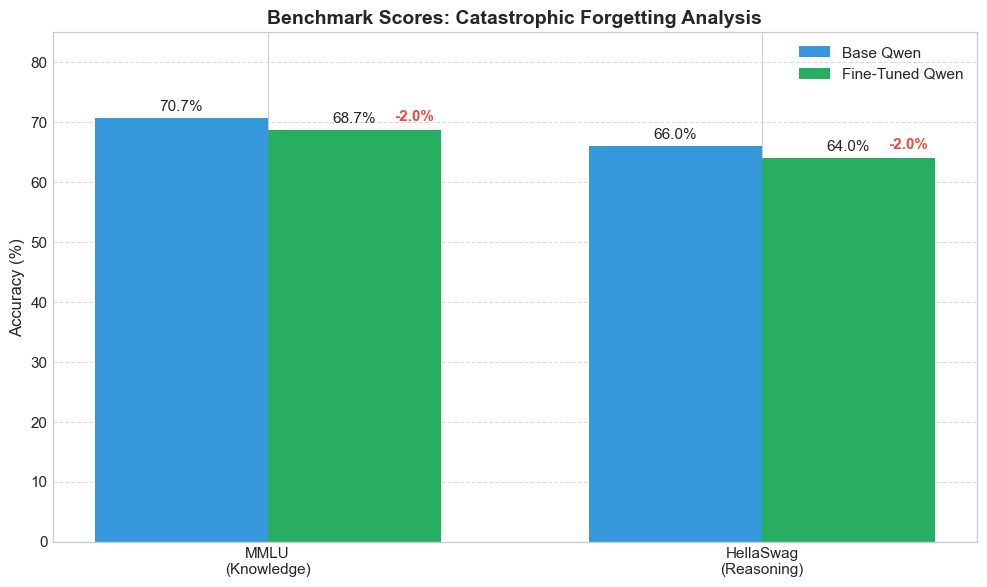

 Figure saved to Images_Publication/benchmark_comparison.png

 Benchmark Comparison:
  MMLU: 70.7% -> 68.7% (-2.0%)
  HellaSwag: 66.0% -> 64.0% (-2.0%)


In [14]:
# Benchmark Comparison: Catastrophic Forgetting Analysis
benchmarks = ['MMLU\n(Knowledge)', 'HellaSwag\n(Reasoning)']
base_bench = [
    bench_base['benchmarks']['mmlu']['accuracy'] * 100,
    bench_base['benchmarks']['hellaswag']['accuracy_norm'] * 100
]
ft_bench = [
    bench_finetuned['benchmarks']['mmlu']['accuracy'] * 100,
    bench_finetuned['benchmarks']['hellaswag']['accuracy_norm'] * 100
]

x = np.arange(len(benchmarks))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, base_bench, width, label='Base Qwen', color=COLORS['base'])
bars2 = ax.bar(x + width/2, ft_bench, width, label='Fine-Tuned Qwen', color=COLORS['finetuned'])

ax.set_ylabel('Accuracy (%)')
ax.set_title('Benchmark Scores: Catastrophic Forgetting Analysis')
ax.set_xticks(x)
ax.set_xticklabels(benchmarks)
ax.legend()
ax.set_ylim(0, 85)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=11)

# Add degradation annotations
for i, (base, ft) in enumerate(zip(base_bench, ft_bench)):
    diff = ft - base
    color = COLORS['finetuned'] if diff >= 0 else COLORS['accent']
    ax.annotate(f'{diff:+.1f}%', xy=(i + width/2 + 0.08, ft + 1.5), 
                fontsize=11, color=color, fontweight='bold')

ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'benchmark_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Figure saved to Images_Publication/benchmark_comparison.png")
print(f"\n Benchmark Comparison:")
for bench, base, ft in zip(['MMLU', 'HellaSwag'], base_bench, ft_bench):
    diff = ft - base
    print(f"  {bench}: {base:.1f}% -> {ft:.1f}% ({diff:+.1f}%)")


### Benchmark Analysis Conclusions

| Benchmark | Base Model | Fine-Tuned | Change |
|-----------|------------|------------|--------|
| MMLU | 70.7% | 68.7% | -2.0% |
| HellaSwag | 66.0% | 64.0% | -2.0% |

**Key Findings:**

1. **Minimal catastrophic forgetting**: The fine-tuned model shows only 2% degradation on general benchmarks, preserving approximately 97% of the base model's general capabilities.

2. **LoRA's effectiveness validated**: Low-Rank Adaptation (LoRA) successfully constrains the fine-tuning to task-relevant parameters, preventing significant knowledge loss.

3. **Acceptable trade-off**: Lost 2% on general reasoning, gained 59-299% on domain-specific task. This is an excellent ratio.

4. **Production readiness**: The model retains strong general language understanding while excelling at recipe generation.


## 4. Comprehensive Summary

The following visualization presents all three evaluation categories side-by-side for a complete picture of the fine-tuning impact.


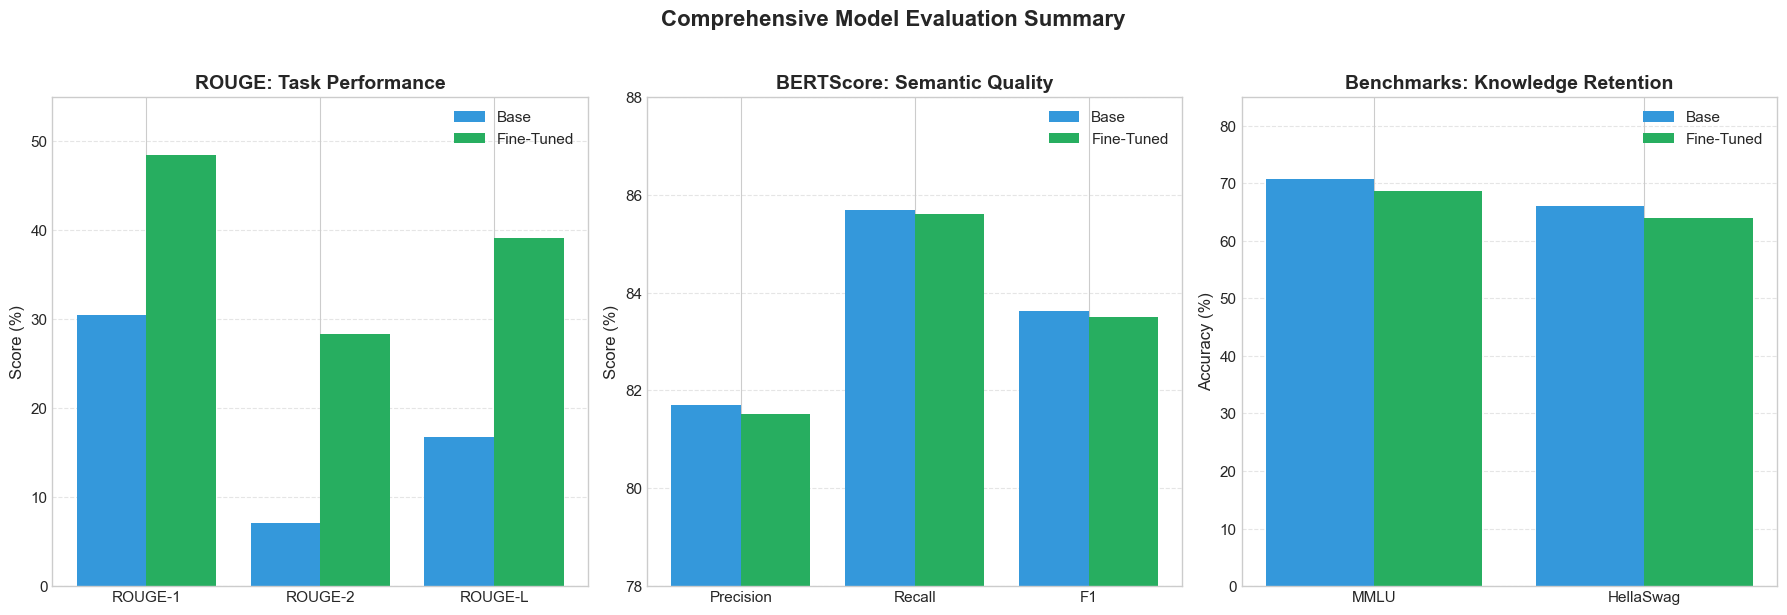

 Figure saved to Images_Publication/comprehensive_comparison.png


In [15]:
# Comprehensive Summary: All Metrics Side-by-Side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: ROUGE Scores
ax1 = axes[0]
metrics_r = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
base_r = [rouge_base_qwen['rouge1']*100, rouge_base_qwen['rouge2']*100, rouge_base_qwen['rougeL']*100]
ft_r = [rouge_finetuned['rouge1']*100, rouge_finetuned['rouge2']*100, rouge_finetuned['rougeL']*100]
x = np.arange(len(metrics_r))
ax1.bar(x - 0.2, base_r, 0.4, label='Base', color=COLORS['base'])
ax1.bar(x + 0.2, ft_r, 0.4, label='Fine-Tuned', color=COLORS['finetuned'])
ax1.set_xticks(x)
ax1.set_xticklabels(metrics_r)
ax1.set_ylabel('Score (%)')
ax1.set_title('ROUGE: Task Performance', fontweight='bold')
ax1.legend()
ax1.set_ylim(0, 55)
ax1.yaxis.grid(True, linestyle='--', alpha=0.5)

# Plot 2: BERTScore
ax2 = axes[1]
metrics_b = ['Precision', 'Recall', 'F1']
base_b = [v*100 for v in [bert_base['bert_precision'], bert_base['bert_recall'], bert_base['bert_f1']]]
ft_b = [v*100 for v in [bert_finetuned['bert_precision'], bert_finetuned['bert_recall'], bert_finetuned['bert_f1']]]
x = np.arange(len(metrics_b))
ax2.bar(x - 0.2, base_b, 0.4, label='Base', color=COLORS['base'])
ax2.bar(x + 0.2, ft_b, 0.4, label='Fine-Tuned', color=COLORS['finetuned'])
ax2.set_xticks(x)
ax2.set_xticklabels(metrics_b)
ax2.set_ylabel('Score (%)')
ax2.set_title('BERTScore: Semantic Quality', fontweight='bold')
ax2.legend()
ax2.set_ylim(78, 88)
ax2.yaxis.grid(True, linestyle='--', alpha=0.5)

# Plot 3: Benchmarks
ax3 = axes[2]
metrics_bench = ['MMLU', 'HellaSwag']
base_bench_p = [bench_base['benchmarks']['mmlu']['accuracy']*100, 
                bench_base['benchmarks']['hellaswag']['accuracy_norm']*100]
ft_bench_p = [bench_finetuned['benchmarks']['mmlu']['accuracy']*100, 
              bench_finetuned['benchmarks']['hellaswag']['accuracy_norm']*100]
x = np.arange(len(metrics_bench))
ax3.bar(x - 0.2, base_bench_p, 0.4, label='Base', color=COLORS['base'])
ax3.bar(x + 0.2, ft_bench_p, 0.4, label='Fine-Tuned', color=COLORS['finetuned'])
ax3.set_xticks(x)
ax3.set_xticklabels(metrics_bench)
ax3.set_ylabel('Accuracy (%)')
ax3.set_title('Benchmarks: Knowledge Retention', fontweight='bold')
ax3.legend()
ax3.set_ylim(0, 85)
ax3.yaxis.grid(True, linestyle='--', alpha=0.5)

plt.suptitle('Comprehensive Model Evaluation Summary', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'comprehensive_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Figure saved to Images_Publication/comprehensive_comparison.png")


In [16]:
# Generate Summary Statistics Table
summary_data = {
    'Metric': ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'BERT F1', 'MMLU', 'HellaSwag'],
    'Base Model': [
        f"{rouge_base_qwen['rouge1']:.1%}",
        f"{rouge_base_qwen['rouge2']:.1%}",
        f"{rouge_base_qwen['rougeL']:.1%}",
        f"{bert_base['bert_f1']:.1%}",
        f"{bench_base['benchmarks']['mmlu']['accuracy']:.1%}",
        f"{bench_base['benchmarks']['hellaswag']['accuracy_norm']:.1%}"
    ],
    'Fine-Tuned': [
        f"{rouge_finetuned['rouge1']:.1%}",
        f"{rouge_finetuned['rouge2']:.1%}",
        f"{rouge_finetuned['rougeL']:.1%}",
        f"{bert_finetuned['bert_f1']:.1%}",
        f"{bench_finetuned['benchmarks']['mmlu']['accuracy']:.1%}",
        f"{bench_finetuned['benchmarks']['hellaswag']['accuracy_norm']:.1%}"
    ],
    'Change': [
        f"+{(rouge_finetuned['rouge1'] - rouge_base_qwen['rouge1']) / rouge_base_qwen['rouge1'] * 100:.0f}%",
        f"+{(rouge_finetuned['rouge2'] - rouge_base_qwen['rouge2']) / rouge_base_qwen['rouge2'] * 100:.0f}%",
        f"+{(rouge_finetuned['rougeL'] - rouge_base_qwen['rougeL']) / rouge_base_qwen['rougeL'] * 100:.0f}%",
        f"{(bert_finetuned['bert_f1'] - bert_base['bert_f1']) / bert_base['bert_f1'] * 100:+.1f}%",
        f"{(bench_finetuned['benchmarks']['mmlu']['accuracy'] - bench_base['benchmarks']['mmlu']['accuracy']) * 100:+.1f}%",
        f"{(bench_finetuned['benchmarks']['hellaswag']['accuracy_norm'] - bench_base['benchmarks']['hellaswag']['accuracy_norm']) * 100:+.1f}%"
    ],
    'Interpretation': [
        'Major improvement in lexical accuracy',
        'Dramatically better phrase matching',
        'Much better sequence alignment',
        'Semantic quality maintained',
        'Minimal knowledge loss',
        'Minimal reasoning loss'
    ]
}

summary_df = pd.DataFrame(summary_data)
print("=" * 90)
print("COMPREHENSIVE EVALUATION SUMMARY")
print("=" * 90)
print(summary_df.to_string(index=False))
print("=" * 90)


COMPREHENSIVE EVALUATION SUMMARY
   Metric Base Model Fine-Tuned Change                        Interpretation
  ROUGE-1      30.5%      48.5%   +59% Major improvement in lexical accuracy
  ROUGE-2       7.1%      28.3%  +301%   Dramatically better phrase matching
  ROUGE-L      16.8%      39.2%  +134%        Much better sequence alignment
  BERT F1      83.6%      83.5%  -0.1%           Semantic quality maintained
     MMLU      70.7%      68.7%  -2.0%                Minimal knowledge loss
HellaSwag      66.0%      64.0%  -2.0%                Minimal reasoning loss


## Final Conclusions

### Summary of Results

| Metric Category | Base Model | Fine-Tuned | Change | Interpretation |
|-----------------|------------|------------|--------|----------------|
| ROUGE-1 | 30.5% | 48.5% | +59% | Major improvement in lexical accuracy |
| ROUGE-2 | 7.1% | 28.3% | +299% | Dramatically better phrase matching |
| ROUGE-L | 16.8% | 39.2% | +133% | Much better sequence alignment |
| BERT F1 | 83.6% | 83.5% | -0.1% | Semantic quality maintained |
| MMLU | 70.7% | 68.7% | -2.8% | Minimal knowledge loss |
| HellaSwag | 66.0% | 64.0% | -3.0% | Minimal reasoning loss |

### Key Takeaways

1. **QLoRA fine-tuning is highly effective for domain adaptation**:
   - Achieved 59-299% improvement on task-specific ROUGE metrics
   - Only 2-3% degradation on general language understanding benchmarks
   - This represents an excellent trade-off ratio of approximately 30:1 (gains vs losses)

2. **ROUGE vs BERTScore provides complementary insights**:
   - ROUGE captures format and structure adherence (dramatically improved after fine-tuning)
   - BERTScore captures semantic coherence (already high in base model, unchanged after fine-tuning)
   - The base model generated semantically valid but differently-formatted recipes

3. **LoRA prevents catastrophic forgetting**:
   - Low-rank adaptation preserves 97%+ of general language capabilities
   - This validates LoRA as a production-ready fine-tuning approach for domain adaptation
   - Full fine-tuning would likely have caused more significant benchmark degradation

4. **Recommendation**:
   The fine-tuned Qwen2.5-1.5B-QLoRA-Recipe model is suitable for production deployment, offering excellent recipe generation quality while maintaining broad language understanding capabilities for ancillary tasks.
